## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [153]:
import pandas as pd

In [154]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [155]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [157]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [158]:
scaler_standard = StandardScaler()
scaled_data_standard = scaler_standard.fit_transform(df)

scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns)
scaled_df_standard.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [159]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Removed 'Unnamed: 0' column")
else:
    print("No 'Unnamed: 0' column found")

df.columns.tolist()

No 'Unnamed: 0' column found


['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



WCSS for each cluster number: [2314.0000000000005, 1661.6761165626503, 1277.928488844642, 1211.7531134671583, 1123.1565470796963, 1079.538509158826, 1014.4309086924652, 982.6549762937698, 927.956076072621, 879.4257007542494]


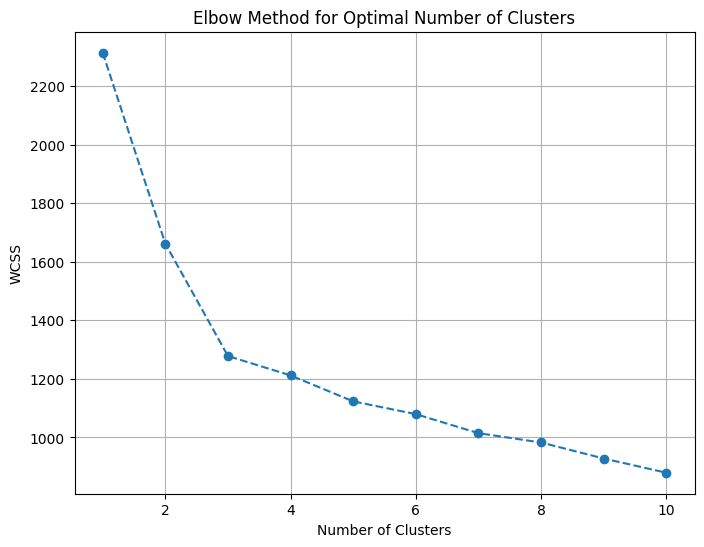

In [161]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df_standard)
    wcss.append(kmeans.inertia_)
print("WCSS for each cluster number:", wcss)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [163]:
#K-means(K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df_standard)

df['Cluster'] = cluster_labels

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [165]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df_standard)
cluster_means = df.groupby('Cluster').mean()

print(cluster_means)

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.696667   619.058824  
2               5.45354

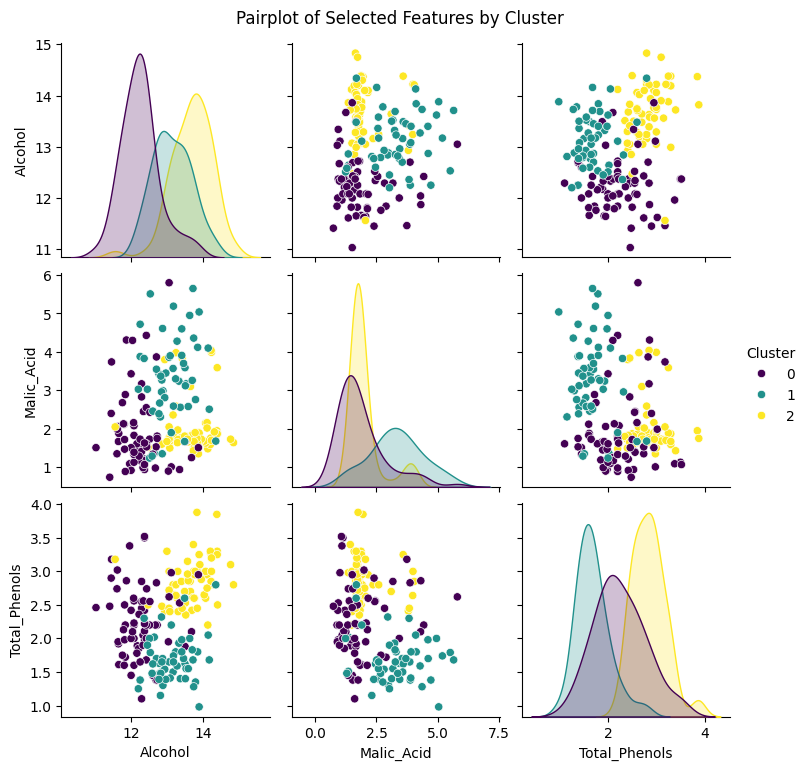

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

#Pairplot for selected features
selected_features = ['Alcohol', 'Malic_Acid', 'Total_Phenols']
sns.pairplot(df, vars=selected_features, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Selected Features by Cluster', y=1.02)
plt.show()

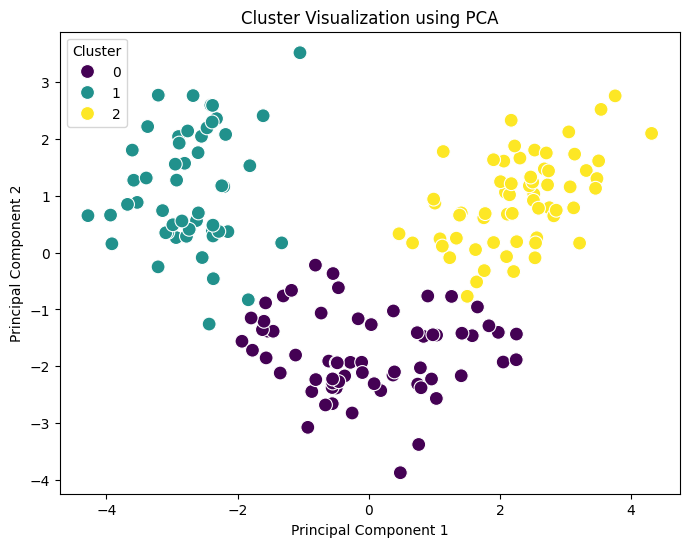

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#2D scatter plot using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df_standard)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


In [169]:
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Characteristics:")
    for feature in cluster_means.columns:
        if cluster_means[feature][cluster] == cluster_means[feature].max():
            print(f"  - Highest {feature}: {cluster_means[feature][cluster]:.2f}")
        elif cluster_means[feature][cluster] == cluster_means[feature].min():
            print(f"  - Lowest {feature}: {cluster_means[feature][cluster]:.2f}")
        else:
            print(f"  - {feature}: {cluster_means[feature][cluster]:.2f}")


Cluster 0 Characteristics:
  - Lowest Alcohol: 12.25
  - Lowest Malic_Acid: 1.90
  - Lowest Ash: 2.23
  - Ash_Alcanity: 20.06
  - Lowest Magnesium: 92.74
  - Total_Phenols: 2.25
  - Flavanoids: 2.05
  - Nonflavanoid_Phenols: 0.36
  - Proanthocyanins: 1.62
  - Lowest Color_Intensity: 2.97
  - Hue: 1.06
  - OD280: 2.80
  - Lowest Proline: 510.17

Cluster 1 Characteristics:
  - Alcohol: 13.13
  - Highest Malic_Acid: 3.31
  - Ash: 2.42
  - Highest Ash_Alcanity: 21.24
  - Magnesium: 98.67
  - Lowest Total_Phenols: 1.68
  - Lowest Flavanoids: 0.82
  - Highest Nonflavanoid_Phenols: 0.45
  - Lowest Proanthocyanins: 1.15
  - Highest Color_Intensity: 7.23
  - Lowest Hue: 0.69
  - Lowest OD280: 1.70
  - Proline: 619.06

Cluster 2 Characteristics:
  - Highest Alcohol: 13.68
  - Malic_Acid: 2.00
  - Highest Ash: 2.47
  - Lowest Ash_Alcanity: 17.46
  - Highest Magnesium: 107.97
  - Highest Total_Phenols: 2.85
  - Highest Flavanoids: 3.00
  - Lowest Nonflavanoid_Phenols: 0.29
  - Highest Proanthocya

In [170]:
# Suggesting cluster names
cluster_names = {
    0: "Premium Red Wine",
    1: "Light White Wine",
    2: "Dark Colored Wine"
}

print("\nSuggested Cluster Names:")
for cluster, name in cluster_names.items():
    print(f"Cluster {cluster}: {name}")


Suggested Cluster Names:
Cluster 0: Premium Red Wine
Cluster 1: Light White Wine
Cluster 2: Dark Colored Wine


# Best of Luck